# 第四章 多层感知机

## 4.1 多层感知机

### 4.1.1 隐藏层
#### 线性模型可能会出错
* 线性意味着单调假设，但是**单调不意味着线性**。例如评估申请人偿还贷款可能性时，收入从0增加到5万，可能比从100万增加到105万带来更大的还款可能性
* **违反单调性**的例子
  * 根据体温预测死亡率。体温高于37摄氏度时，温度越高风险越大。但是低于37摄氏度时，温度越高风险越小。可以使用与37摄氏度的距离作为特征
  * 对猫狗图像进行分类，增加（13,17）处的像素强度是否会增加/降低图像描绘狗的似然？任何像素的重要性都以复杂的方式取决于该像素的上下文（周围像素的值）

#### 在网络中加入隐藏层
* 通过在网络中加入一个或多个隐藏层来克服线性模型的限制，使其能处理更普遍的函数关系模型
* **多层感知机（multilayer perceptron, MLP）**
  * 将许多全连接层堆叠在一起
  * 每一层都输出到上面的层，直到生成最后的输出
  * 可以把前L-1层看作表示，把最后一层看作**线性预测器**
  * 一个单隐藏层的多层感知机，具有5个**隐藏单元**
    
  ![4.1.1](./images/4.1.1.png)

#### 从线性到非线性
* 线性表示
  * $\textbf{X}\in\mathbb{R}^{n \times d}$表示$n$个样本的小批量，其中每个样本具有$d$个输入特征
  * 对于具有$h$个隐藏单元的单隐藏层多层感知机，用$\textbf{H}\in\mathbb{R}^{n \times h}$表示隐藏层的输出，称为隐藏表示（hidden representation）。在数学或代码中，$\textbf{H}$也被称为隐藏层变量（hidden-layer variable）或隐藏变量（hidden variable）
  * 隐藏层和输出层都是全连接的，所以有隐藏层权重$\textbf{W}^{(1)}\in\mathbb{R}^{d \times h}$和隐藏层偏置$\textbf{b}^{(1)}\in\mathbb{R}^{1 \times h}$以及输出层权重$\textbf{W}^{(2)}\in\mathbb{R}^{h \times q}$和输出层偏置$\textbf{b}^{(2)}\in\mathbb{R}^{1 \times q}$
  * 计算单隐藏层多层感知机的输出$\textbf{O}\in\mathbb{R}^{n \times q}$：
    $$\textbf{H}=\textbf{XW}^{(1)}+\textbf{b}^{(1)},$$
    $$\textbf{O}=\textbf{HW}^{(2)}+\textbf{b}^{(2)}.$$
  * 添加隐藏层后，没有任何好处，因为上述2式可以合并成：
    $$\textbf{O}=\textbf{XW}+\textbf{b}.$$
* 非线性表示
  * 发挥多层架构潜力的关键因素：在仿射变换后对每个隐藏单元应用**非线性**的 **激活函数（activation function）** $\sigma$，激活函数的输出（例如$\sigma(.)$）被称为**活性值（activations）**
  * 一般来说，有了激活函数，多层感知机就不可能退化成线性模型：
    $$\textbf{H}=\sigma(\textbf{XW}^{(1)}+\textbf{b}^{(1)}),$$
    $$\textbf{O}=\textbf{HW}^{(2)}+\textbf{b}^{(2)}.$$
  * 为了构建更通用的感知机，可以继续堆叠隐藏层，例如$\textbf{H}^{(1)}=\sigma_1(\textbf{XW}^{(1)}+\textbf{b}^{(1)})$ 和$\textbf{H}^{(2)}=\sigma_2(\textbf{H}^{(1)}\textbf{W}^{(2)}+\textbf{b}^{(2)})$，一层叠一层，从而产生更有**表达能力**的模型

#### 通用近似定理
* 单隐藏层网络能学习任何函数（给定足够的神经元和正确的权重）
* 但并不意味着应该尝试使用单隐藏层网络来解决所有问题
* 通过使用**更深（而不是更广）的网络**，可以更容易地逼近许多函数

### 4.1.2 激活函数
* 激活函数（activation function）**通过计算加权和并加上偏置来确定神经元是否应该被激活**，它们将输入信号转换为输出的可微运算。大多数激活函数都是非线性的
* 常见激活函数
  * ReLU函数
  * sigmoid函数
  * tanh函数

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

#### ReLU函数
* 修正线性单元（Rectified linear unit, ReLU）
  $$\text{ReLU}(x)=\text{max}(x,0)$$
* 最受欢迎，因为实现简单，同时在各种预测任务中表现良好
* 优点
  * **求导表现**特别好：要么让参数消失，要么让参数通过
  * 减轻了困扰以往神经网络的**梯度消失**问题

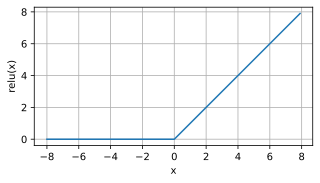

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), xlabel='x', ylabel='relu(x)', figsize=(5, 2.5))

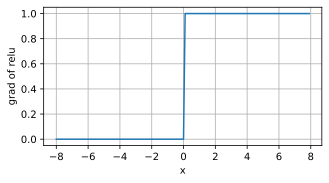

In [3]:
# 输入精确等于0时不可导，也认为导数为0
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

ReLU的变体，包括**参数化ReLU（Parameterized ReLU, pReLU）** 函数。添加一个线性项，即使参数为负时某些信息仍然可以通过
$$\text{pRelu}(x)=\text{max}(0,x)+\alpha \text{min}(0,x)$$

#### sigmoid函数
* 将定义域在$\mathbb{R}$中的输入变换为区间(0,1)上的输出。因此通常称为**挤压函数（squashing function）**：将范围(-inf,inf)中的任意输入压缩到区间(0,1)中的某个值：
  $$\text{sigmoid}(x)=\frac{1}{1+\text{exp}(-x)}$$
* 特点
  * 平滑、可微的阈值单元近似
  * 将输出视作**二元分类**问题的概率时，sigmoid被广泛用作输出单元上的激活函数（可以视为softmax的特例）
  * 在隐藏层中较少使用，大部分时候被更简单、更容易训练的ReLU取代

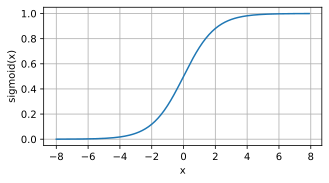

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

导数
$$\frac{d}{dx}\text{sigmoid}(x)=\frac{\text{exp}(-x)}{(1+\text{exp}(-x))^2}=\text{sigmoid}(x)(1-\text{sigmoid}(x))$$

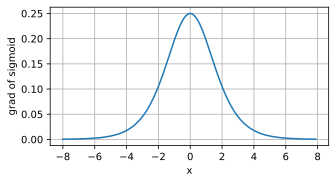

In [5]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### tanh函数
* 双曲正切，类sigmoid，将输入压缩转换到区间(-1,1)上
  $$\text{tanh}(x)=\frac{1-\text{exp}(-2x)}{1+\text{exp}(-2x)}$$

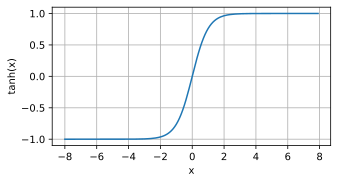

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

导数
$$\frac{d}{dx}\text{tanh}(x)=1-\text{tanh}^2(x)$$

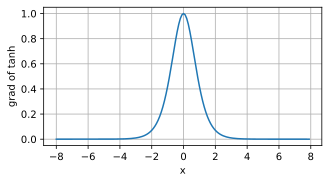

In [7]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 4.2 多层感知机的从零开始实现

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 4.2.1 初始化模型参数
* 超参数隐藏单元个数， 选择2的若干次幂，在计算上更高效

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256 # 256个隐藏单元

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 4.2.2 激活函数

In [11]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 4.2.3 模型

In [12]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1) # "@"代表矩阵乘法
    return (H@W2 + b2)

### 4.2.4 损失函数

In [13]:
loss = nn.CrossEntropyLoss(reduction='none')

### 4.2.5 训练

In [14]:
# Copied from ch03

from IPython import display

def accuracy(y_hat, y): #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y # [False, True]
    return float(cmp.type(y.dtype).sum()) # [False, True] -> [0, 1]再求和

def evaluate_accuracy(net, data_iter): #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval() # 将模型设置为评估模式
    metric = Accumulator(2) # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

class Accumulator: #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

def train_epoch_ch3(net, train_iter, loss, updater): #@save
    """训练模型一个迭代周期"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()

    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

class Animator: #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-', 'r:'), nrows=1, ncols=1, figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater): #@save
    """训练模型"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9], legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

def predict_ch3(net, test_iter, n=6): #@save
    """预测标签"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

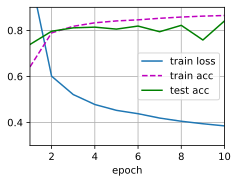

In [15]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

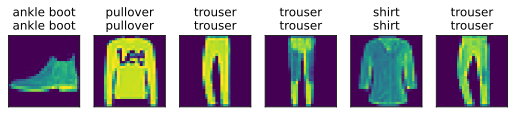

In [16]:
# 预测
predict_ch3(net, test_iter)

![fashion-mnist-4.2.5.png](./images/fashion-mnist-4.2.5.png)

## 4.3 多层感知机的简洁实现

In [17]:
import torch
from torch import nn
from d2l import torch as d2l

### 4.3.1 模型

In [18]:
net = nn.Sequential(nn.Flatten(), # 展平层
                    nn.Linear(784, 256), # 隐藏层
                    nn.ReLU(), # 隐藏层激活函数
                   nn.Linear(256, 10)) # 输出层

# 初始化模型参数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.1)

net.apply(init_weights);

In [19]:
# 损失函数 & 优化算法
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

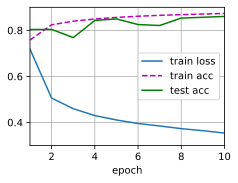

In [20]:
# 训练
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)